In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

In [74]:
data = pd.read_csv('D:\\Dataset\\Howell1.csv', sep=';')
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [75]:
data.shape

(544, 4)

In [7]:
data.isna().sum()

height    0
weight    0
age       0
male      0
dtype: int64

In [8]:
data.isnull().sum()

height    0
weight    0
age       0
male      0
dtype: int64

In [76]:
data.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


### Visualize the Data

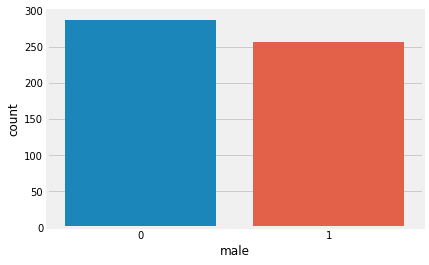

In [13]:
sns.countplot('male', data=data)

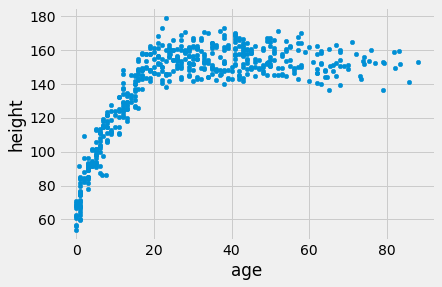

In [77]:
data.plot(x='age', y='height', kind='scatter')

### Fit Regression Line

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


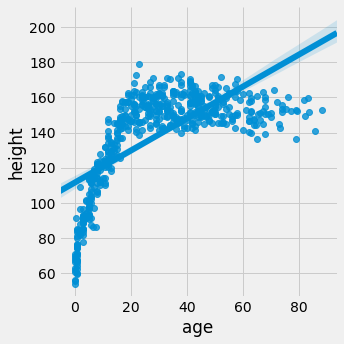

In [78]:
import seaborn as sns
sns.lmplot(x='age',y='height',data=data,fit_reg=True)

As you can see from the data that height of a person increase from age 0 to 20 but tend to stabilize after 20 years. During this phase we can see that its easier to fit a linear model but after that the data doesn’t signify any linear interaction between age and height

A linear model would not perform well on all the dataset. But if we consider only the data in the range age 0 to 20 we can linear model does a better job of fitting the model

### Fit a linear model for age < 20

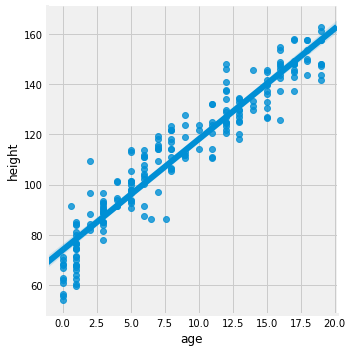

In [19]:
sns.lmplot(x='age', y='height', data=data[data.age<20], fit_reg=True)

### Simple Linear model

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

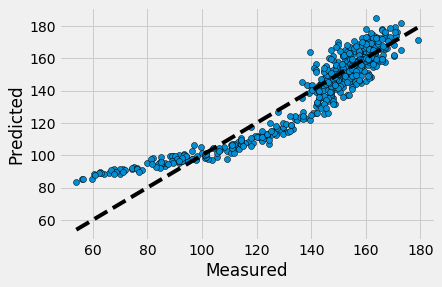

MEAN Squared Error : 89.62222301721022. (Lower the better)


In [79]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

As we can see above the Error is significantly high. Predictions are off quite a bit.

Lets try to help the linear model by adding more features.

As we see from the data we can probably add a new feature like age < 20

In [80]:
data['age_less_than_20'] = (data.age<20).astype(int)

In [81]:
data.head()

,height,weight,age,male,age_less_than_20
0,151.765,47.825606,63.0,1,0
1,139.700,36.485807,63.0,0,0
2,136.525,31.864838,65.0,0,0
3,156.845,53.041915,41.0,1,0
4,145.415,41.276872,51.0,0,0


In [29]:
data.shape

(544, 5)

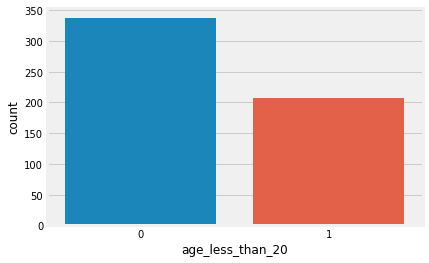

In [31]:
sns.countplot('age_less_than_20', data=data)

### Now lets try to fit the model again with this new feature

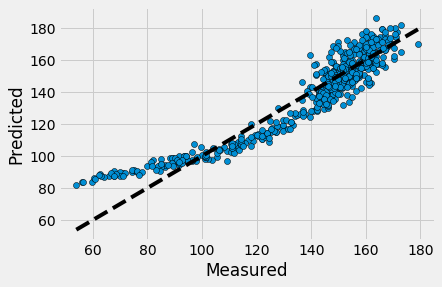

MEAN Squared Error : 85.68689844692359. (Lower the better)


In [82]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

We can see that the error decreased, but not a lot. Let go ahead and add a feature which is square of the age and square of the weight

In [83]:
data['squared_age'] = data['age'] ** 2

In [84]:
data['squared_weight'] = data['weight'] ** 2

In [85]:
data.head()

,height,weight,age,male,age_less_than_20,squared_age,squared_weight
0,151.765,47.825606,63.0,1,0,3969.0,2287.288637
1,139.700,36.485807,63.0,0,0,3969.0,1331.214076
2,136.525,31.864838,65.0,0,0,4225.0,1015.367901
3,156.845,53.041915,41.0,1,0,1681.0,2813.444694
4,145.415,41.276872,51.0,0,0,2601.0,1703.780162


In [72]:
data.shape

(544, 4)

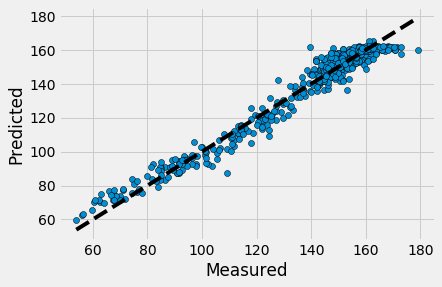

MEAN Squared Error : 28.50927817848125. (Lower the better)


In [86]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'height']
target = data.height
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

Great! We were able to reduce the error from 89 to 28.5 by adding higher order features. One thing to note is that the model complexity increase as we add more higher order features